# Phython for Audio Processing

## Installation
**On-line:**

The easiest way is to use virtual machines on [Google Colab.](http://colab.research.google.com/)

**On your machine:**

*The simplest* way is to set-up [Anaconda](https://www.anaconda.com/products/distribution) and add required packages.


We will need [PyTorch,](https://pytorch.org/) if you have a CUDA GPU, choose the option with CUDA.

*More complicated* way is to download [Python 3](https://www.python.org/downloads/) (on macOS, Python 3 is preinstalled) and install missing packages, including [PyTorch,](https://pytorch.org/)  [Jupyter,](https://jupyter.org/install) and [IPython.](https://ipython.org/install.html)

Note: If you use Anaconda, install packages with “conda install”, if you don’t have Conda, install with “pip3 install”

[VScode](https://code.visualstudio.com/download) is a convenient IDE. Here is a [video by Chris State](https://youtu.be/veJvQ88ULOM) that explains how one connects the Python to it. Just because it has been changed a little, don’t insert path in a .json file but use *Extension* $\longrightarrow$ *Python* $\longrightarrow$ *Default Interpreter Path* instead.

Different tools for deep learning: TensorFlow2, PyTorch, JAX

Usage of !, %, if ```__name__ == "__main__":```

exclamation mark ! executes commands from the underlying operating system

% affects the process associated with the notebook

```"__main__":``` is not meeded in Python3, it is used now to separate functions from the code to import them

In [ ]:
!pwd
#!pip install ipywebrtc

/content


In [ ]:
#%cd ..

In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.display import Audio

In [36]:
!wget https://raw.githubusercontent.com/anton-selitskiy/RIT_LLM/refs/heads/main/Week13_asr/MySTFT.py

In [9]:
from MySTFT import *

####Usefull Shortcuts

Shift+Enter - run cell

Ctrl+/ - comment lines

Ctrl+] - indent lines

##Tensors in PyTorch https://pytorch.org/docs/stable/tensors.html

In [ ]:
x = torch.Tensor([1,2,3,4])

In [ ]:
x
#print(x)

tensor([1., 2., 3., 4.])

###Shape

Q1 reshape

In [ ]:
x.shape
#x.size()

torch.Size([4])

In [ ]:
x.view(2,2)
#x.reshape(2,2)

tensor([[1., 2.],
        [3., 4.]])

Q2 inplace operations

In [ ]:
x.pow(2)

tensor([ 1.,  4.,  9., 16.])

In [ ]:
x

tensor([1., 2., 3., 4.])

In [ ]:
x.pow_(2)
x

tensor([ 1.,  4.,  9., 16.])

###Broadcasting

In [ ]:
a=torch.Tensor([1,2,3])
a=a.view(-1,1)
a

tensor([[1.],
        [2.],
        [3.]])

In [ ]:
b=torch.rand(3,4)
b

tensor([[0.4872, 0.7175, 0.7110, 0.5353],
        [0.6491, 0.4849, 0.2766, 0.3721],
        [0.8324, 0.3071, 0.4025, 0.0094]])

In [ ]:
a*b

tensor([[0.4872, 0.7175, 0.7110, 0.5353],
        [1.2981, 0.9698, 0.5531, 0.7441],
        [2.4971, 0.9213, 1.2074, 0.0282]])

In [ ]:
x*b

tensor([[0.4872, 2.8699, 6.3990, 8.5654],
        [0.6491, 1.9397, 2.4891, 5.9528],
        [0.8324, 1.2284, 3.6223, 0.1502]])

###Matrix Multiplication

In [ ]:
torch.matmul(b,x)

tensor([18.3215, 11.0307,  5.8333])

In [ ]:
b.matmul(x)

tensor([18.3215, 11.0307,  5.8333])

In [ ]:
b@x

tensor([18.3215, 11.0307,  5.8333])

###Data Type https://pytorch.org/docs/stable/tensors.html

In [ ]:
x.dtype

torch.float32

In [ ]:
x.type(torch.long)

tensor([ 1,  4,  9, 16])

In [ ]:
x.to(torch.long)

tensor([ 1,  4,  9, 16])

In [ ]:
x

tensor([ 1.,  4.,  9., 16.])

###Concatanating

Q4 How do we do STFT?

In [ ]:
#[1,2,3,4,5,6,7,8,9,10,11...]
h1 = torch.Tensor([1,2,3,4,5])
h2 = torch.Tensor([3,4,5,6,7])
#...

In [ ]:
h1.shape

torch.Size([5])

We can apply window to each h1 and h2 before stacking or after

In [ ]:
h = torch.stack([h1,h2]).T
h

tensor([[1., 3.],
        [2., 4.],
        [3., 5.],
        [4., 6.],
        [5., 7.]])

Zero padding:

In [ ]:
import torch.nn as nn

In [ ]:
nn.ConstantPad1d((0,2*len(h1)),0)(h1)

tensor([1., 2., 3., 4., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
nn.functional.pad(torch.stack([h1,h2]).T, (0,0,0,2*len(h1)), "constant", 0)

tensor([[1., 3.],
        [2., 4.],
        [3., 5.],
        [4., 6.],
        [5., 7.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

##TorchAudio [tutorial](https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html)

###Dounload and play
mono 'PinkPanther30.wav' from https://www2.cs.uic.edu/~i101/SoundFiles/

stereo 'prelude_cmaj_10s.wav' from https://ccrma.stanford.edu/workshops/mir2014/audio/

In [37]:
!wget  https://ccrma.stanford.edu/workshops/mir2014/audio/prelude_cmaj_10s.wav

In [38]:
# It took 6-7 minutes on Colab
!wget https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2
!tar -xf LJSpeech-1.1.tar.bz2

In [14]:
path = 'LJSpeech-1.1/wavs/LJ001-0013.wav'  #'PinkPanther30.wav' #'StarWars3.wav' #'Schumann.wav'#/Users/airlab/Downloads/courante.wav
path2 = 'prelude_cmaj_10s.wav'

In [15]:
wav, sr = torchaudio.load(path)

In [20]:
sr

22050

In [16]:
wav2, sr2 = torchaudio.load(path2)

In [17]:
wav.shape

torch.Size([1, 56989])

In [18]:
Audio(data=wav, rate=sr)

###Visualize

In [39]:
plt.plot(wav[0])
#plt.plot(wav[0][-100:])

Q5 To set the time correctly

In [ ]:
t = np.arange(wav.shape[-1])/sr

In [ ]:
#plt.plot(t,wav[0])

In [ ]:
import librosa, librosa.display

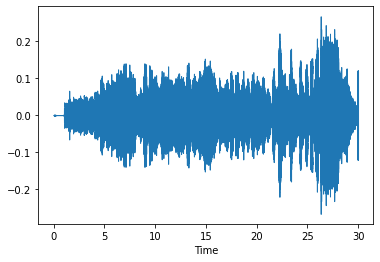

In [ ]:
librosa.display.waveshow(wav[0].numpy(), sr)
#librosa.display.waveshow(wav[0].numpy()[-100:], sr)

Saving audio to file

In [ ]:
torchaudio.save('new_wav.wav', wav, sr)

###Resample and other operations


https://pytorch.org/audio/stable/functional.html

https://pytorch.org/audio/stable/transforms.html

In [ ]:
print(torchaudio.info(path))

AudioMetaData(sample_rate=22050, num_frames=41885, num_channels=1, bits_per_sample=16, encoding=PCM_S)


###Window
By default it's periodic

In [ ]:
w = torch.hann_window(64,periodic=False)

In [ ]:
w_p = torch.hann_window(64)

Text(0.5, 1.0, 'Hann Window')

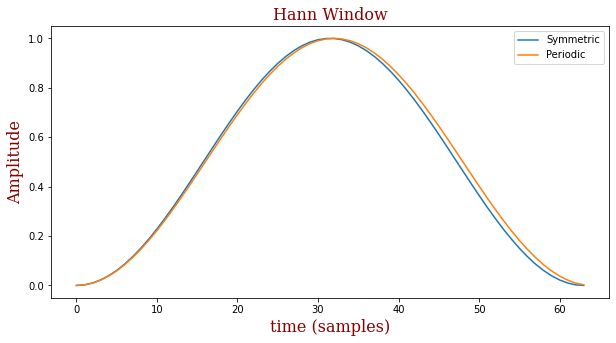

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(w)
plt.plot(w_p)
plt.legend(['Symmetric', 'Periodic'])
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.xlabel('time (samples)', fontdict=font)
plt.ylabel('Amplitude', fontdict=font)
plt.title('Hann Window', fontdict=font)
#plt.savefig('window')
#plt.close(fig)
#plt.show()

###Spectrogram

Example a sinusoidal wave

In [ ]:
Fs = 2000
T=1
Ts = 1/Fs
n = T//Ts
t = np.arange(n)*Ts
y = np.sin(2*np.pi*t)

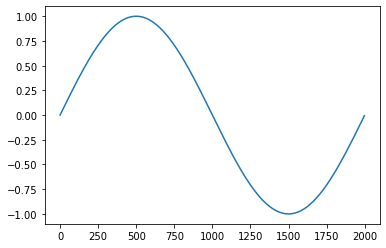

In [ ]:
plt.plot(y)

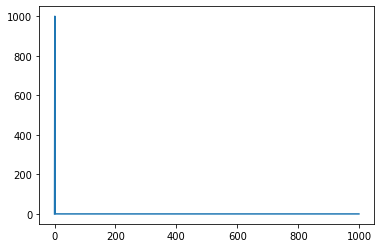

In [ ]:
y_fft = torch.fft.fft(torch.Tensor(y))
plt.plot(y_fft.abs()[:len(y_fft)//2+1]) #.log10()

In [ ]:
y_t = torch.Tensor(y)
y_pad_fft = torch.fft.fft(nn.ConstantPad1d((0,3*len(y_t)),0)(y_t))
plt.plot(y_pad_fft.abs().log10())
# y_pad_fft_2 = torch.fft.fft(nn.ConstantPad1d((0,9*len(y_t)),0)(y_t))
# plt.plot(y_pad_fft_2.abs().log10()[:200])
# plt.legend(['1', '2'])

In [21]:
n_fft=512*2
hop_length=256 #Usually 1/2 or 1/4 of the window length
w =  torch.ones(n_fft) #torch.hann_window(n_fft) )

In [22]:
st = MySTFT(wav, sr, n_fft, hop_length, w, 0)

In [23]:
st.shape

torch.Size([513, 219])

In [ ]:
#amplitude and phase
#torch.allclose(st,st.abs()*torch.exp(1j*st.angle()))

####Torch STFT
```torch.stft``` has hop_length = 1/4 of the window_length and if the window is not specified, it's a rectangular window https://pytorch.org/docs/stable/generated/torch.stft.html

In [24]:
stf = torch.stft(wav[0], n_fft=n_fft, hop_length=hop_length, return_complex=True)  #, center=False window=w,

/usr/local/lib/python3.11/dist-packages/torch/functional.py:709: UserWarning: A window was not provided. A rectangular window will be applied,which is known to cause spectral leakage. Other windows such as torch.hann_window or torch.hamming_window can are recommended to reduce spectral leakage.To suppress this warning and use a rectangular window, explicitly set `window=torch.ones(n_fft, device=<device>)`. (Triggered internally at /pytorch/aten/src/ATen/native/SpectralOps.cpp:836.)
  return _VF.stft(  # type: ignore[attr-defined]


In [25]:
stf2 = torch.stft(wav2[0], n_fft=2*n_fft, hop_length=hop_length, return_complex=True)  #, center=False window=w,

In [26]:
stf.shape

torch.Size([513, 223])

In [ ]:
torch.allclose(stf, st)

In [40]:
plt.figure(figsize=(25,10))
plt.imshow(20*stf.squeeze().abs().log10(), origin='lower')

https://pytorch.org/tutorials/beginner/audio_preprocessing_tutorial.html

In [41]:
Audio(data=wav, rate=sr)

In [ ]:
plt.figure(figsize=(25,10))
plt.imshow(librosa.power_to_db(stf.squeeze().abs(), amin=1e-10, top_db=None), origin='lower')  #, top_db=None
plt.colorbar(format="%+2.f dB")

In [ ]:
plt.figure(figsize=(25,10))
plt.imshow(20*torch.clip(stf.squeeze().abs(), min=1e-10).log10(), origin='lower')

In [ ]:
torch.allclose(torch.Tensor(librosa.power_to_db(stf.squeeze().abs(), amin=1e-10, top_db=None)), 10*torch.clip(stf.squeeze().abs(), min=1e-10).log10())

True

####TorchAudio STFT
torchaudio uses hop_length = 1/2 window_length and the window function is periodic (not symmetric) by default. Therefore, people usually use torch.stft

In [ ]:
spec = torchaudio.transforms.Spectrogram(
    n_fft=n_fft,
    center = False,
    #win_length=win_length,
    window_fn= torch.ones, #torch.hann_window
    hop_length=hop_length
)(wav[0])
# griffin_lim = torchaudio.transforms.GriffinLim(
#     n_fft=n_fft,
#     #win_length=win_length,
#     hop_length=hop_length,
# )
# waveform = griffin_lim(spec)  #stf.squeeze().abs()

In [ ]:
torch.allclose(st.abs()**2,spec)

True

###Librosa Spectrogram

In [ ]:
plt.figure(figsize=(30,10))
librosa.display.specshow(librosa.amplitude_to_db(stf.abs().numpy()**2), y_axis='log', sr=sr, hop_length=hop_length, x_axis='time')
plt.colorbar(format="%+2.f dB")

###Inverse STFT

In [ ]:
recA = iMySTFT(wav, sr, n_fft, hop_length, w, 0)

In [ ]:
Audio(data=recA, rate=sr)

In [ ]:
istf = torch.istft(stf,n_fft=n_fft, hop_length=hop_length, center=False)

In [ ]:
Audio(data=istf, rate=sr)

In [42]:
torch.allclose(recA, istf)

###Mel Spectrogram

In [32]:
n_fft = 512 #1024
win_length = None
hop_length = 256 #512
n_mels = 80

mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=sr,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm='slaney',
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)

/usr/local/lib/python3.11/dist-packages/torchaudio/transforms/_transforms.py:580: UserWarning: Argument 'onesided' has been deprecated and has no influence on the behavior of this module.
  warnings.warn(


In [33]:
melspec = mel_spectrogram(wav[0])
#plot_spectrogram(melspec[0], title="MelSpectrogram - torchaudio", ylabel='mel freq')

In [43]:
plt.figure(figsize=(25,10))
plt.imshow(librosa.power_to_db(melspec), origin='lower')

###Mel Filter Bank

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(mel_spectrogram.mel_scale.fb, origin='lower')

In [ ]:
mel_filters_librosa = librosa.filters.mel(
    sr,
    n_fft,
    n_mels=n_mels,
    fmin=0.,
    fmax=sr/2.,
    norm='slaney',
    htk=True,
).T

In [ ]:
plt.imshow(mel_filters_librosa, origin='lower')

In [ ]:
torch.allclose(torch.Tensor(mel_filters_librosa), mel_spectrogram.mel_scale.fb)

True

In [ ]:
mel_spectrogram.mel_scale.fb.copy_(torch.tensor(mel_filters_librosa))

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0114, 0.0273, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0247,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0005],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0003],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])